In [ ]:
# The dataset is open-source dataset downloaded from kaggle - https://www.kaggle.com/datasets/kelvinkelue/credit-card-fraud-prediction

# The notebook covers following analysis:
# 1. Fraud Distribution: Calculated the overall percentage of fraudulent transactions in the dataset.
# 2. Transaction Amounts: Analyzed the distribution of transaction amounts (mean, median, standard deviation, etc.) for both fraudulent and non-fraudulent cases.
# 3. Feature Exploration: Examined the distribution of categorical features like 'category', 'gender', 'city', etc., potentially looking for associations with fraud.
# 4. Time Analysis: Checked if fraud is concentrated in specific times of day or days of the week.
# 5. Merchant Analysis: Identified merchants frequently involved in fraudulent activities.
# 6. Clustering: Applied K-Means clustering to group transactions, analyzed cluster characteristics (e.g., transaction amount patterns, geographic location) and focused on clusters with a high concentration of fraud.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('fraud_test.csv')

In [5]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [6]:
df.shape

(555719, 23)

In [7]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [8]:
df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                   float64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [11]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800430e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521420e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635330e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992350e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [30]:
df = df.drop('Unnamed: 0', axis = 1)

# Fraud Distribution

In [31]:
# Fraud Distribution
fraud_count = df['is_fraud'].sum()
total_count = len(df)
fraud_percentage = (fraud_count / total_count) * 100
fraud_percentage

0.3859864427885316

# Transaction Amount Analysis

In [15]:
# Transaction Amount Analysis
transaction_amount_stats = df['amt'].describe()
transaction_amount_stats

count    555719.000000
mean         69.392810
std         156.745941
min           1.000000
25%           9.630000
50%          47.290000
75%          83.010000
max       22768.110000
Name: amt, dtype: float64

# Feature Exploration

<Axes: xlabel='category'>

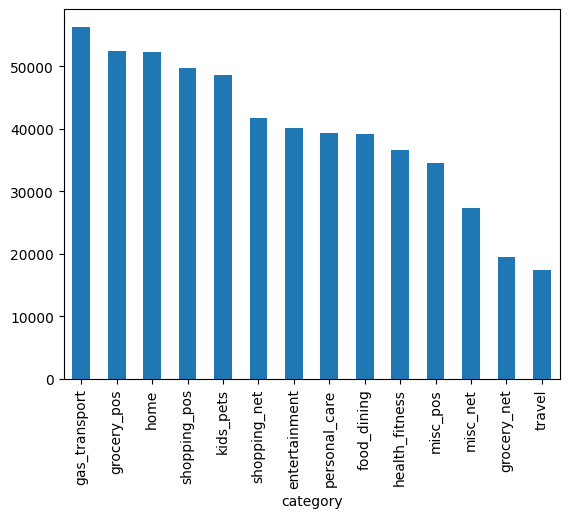

In [16]:
# Feature Exploration (Categorical)
df['category'].value_counts().plot(kind='bar')  # Plot category distribution


# Time Analysis

<Axes: xlabel='hour'>

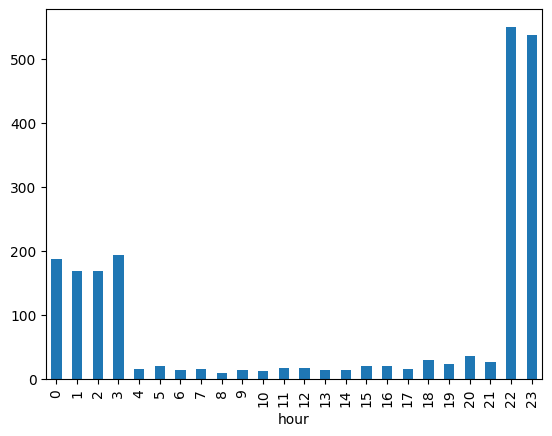

In [32]:
df['hour'] = pd.to_datetime(df['trans_date_trans_time'], format='%d/%m/%Y %H:%M').dt.hour
df['is_fraud'].groupby(df['hour']).sum().plot(kind='bar')  # Plot fraud by hour

In [33]:
print("Fraud Percentage:", fraud_percentage, "%")
print("\nTransaction Amount Stats:\n", transaction_amount_stats)

Fraud Percentage: 0.3859864427885316 %

Transaction Amount Stats:
 count    555719.000000
mean         69.392810
std         156.745941
min           1.000000
25%           9.630000
50%          47.290000
75%          83.010000
max       22768.110000
Name: amt, dtype: float64


# Merchant Analysis

In [34]:
df[df['is_fraud'] == 1]['merchant'].value_counts().head(10)

merchant
fraud_Romaguera, Cruickshank and Greenholt    18
fraud_Lemke-Gutmann                           18
fraud_Mosciski, Ziemann and Farrell           18
fraud_Schultz, Simonis and Little             17
fraud_Heathcote, Yost and Kertzmann           17
fraud_Boyer PLC                               15
fraud_Medhurst PLC                            15
fraud_Miller-Hauck                            15
fraud_Heathcote LLC                           15
fraud_Kilback LLC                             15
Name: count, dtype: int64

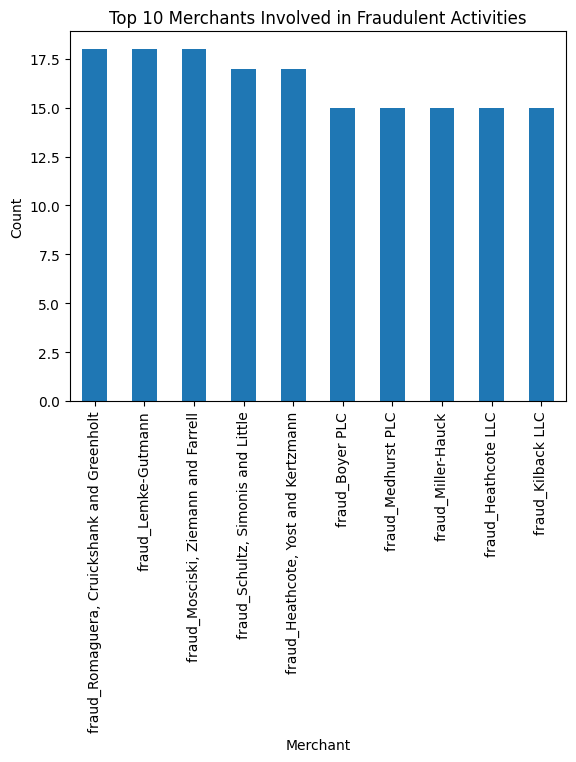

In [35]:
import matplotlib.pyplot as plt

top_fraud_merchants = df[df['is_fraud'] == 1]['merchant'].value_counts().head(10)
top_fraud_merchants.plot(kind='bar')
plt.title("Top 10 Merchants Involved in Fraudulent Activities")
plt.xlabel("Merchant")
plt.ylabel("Count")
plt.show()


# **Clustering**

In [43]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 

In [44]:
# 1. Data Preparation
df_clustering = df[['amt', 'lat', 'long']]  # Select features 
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_clustering), columns=df_clustering.columns) 


In [45]:
# 2. Elbow Method (to help choose 'k')
inertias = []
for k in range(2, 10): 
    model = KMeans(n_clusters=k)
    model.fit(df_scaled)
    inertias.append(model.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

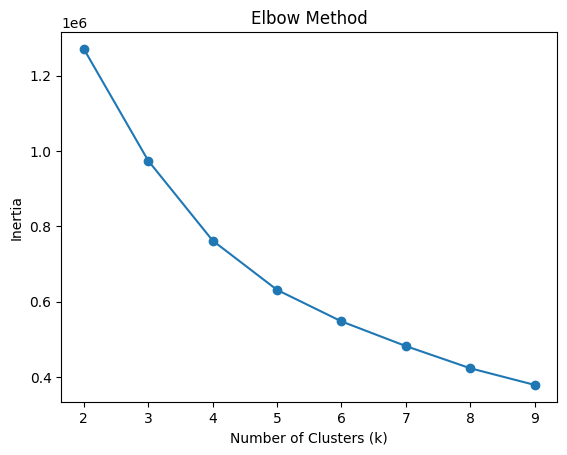

In [47]:
# Plot the inertia to find the elbow
plt.plot(range(2, 10), inertias, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

In [48]:
# 3. K-Means Clustering (Let's assume the elbow method suggests k=4)
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_scaled)
df['cluster'] = kmeans.labels_


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [49]:
# 4. Analysis
for i in range(4):
    print(f"\nCluster {i}:")
    print(df[df['cluster'] == i]['amt'].describe())

    # Calculate percentage of fraud within the cluster:
    fraud_in_cluster = df[df['cluster'] == i]['is_fraud'].sum() / len(df[df['cluster'] == i]) * 100
    print(f"Fraud Percentage: {fraud_in_cluster:.2f}%") 


Cluster 0:
count     3150.000000
mean      1363.329559
std       1303.211835
min        706.470000
25%        854.940000
50%       1001.120000
75%       1318.817500
max      22768.110000
Name: amt, dtype: float64
Fraud Percentage: 29.46%

Cluster 1:
count    99157.000000
mean        62.950781
std         75.425460
min          1.000000
25%          9.680000
50%         46.770000
75%         83.090000
max        806.160000
Name: amt, dtype: float64
Fraud Percentage: 0.20%

Cluster 2:
count    283186.000000
mean         61.656515
std          72.560109
min           1.000000
25%           9.600000
50%          47.660000
75%          82.220000
max         728.180000
Name: amt, dtype: float64
Fraud Percentage: 0.23%

Cluster 3:
count    170226.000000
mean         62.071261
std          74.557582
min           1.000000
25%           9.470000
50%          45.640000
75%          81.650000
max         748.960000
Name: amt, dtype: float64
Fraud Percentage: 0.22%


In [51]:
for i in range(4):  # Assuming 4 clusters
    print(f"\nCluster {i}:")
    print(df[df['cluster'] == i].describe()) 


Cluster 0:
             cc_num           amt           zip          lat         long  \
count  3.150000e+03   3150.000000   3150.000000  3150.000000  3150.000000   
mean   3.544591e+17   1363.329559  48804.847302    38.613704   -90.182999   
std    1.220029e+18   1303.211835  26854.627617     5.013558    13.710642   
min    6.041621e+10    706.470000   1257.000000    20.027100  -165.672300   
25%    1.800188e+14    854.940000  26250.750000    34.632300   -96.743000   
50%    3.517670e+15   1001.120000  48214.000000    39.266900   -87.476900   
75%    4.514240e+15   1318.817500  72011.000000    42.076500   -80.158000   
max    4.992350e+18  22768.110000  99921.000000    64.755600   -67.950300   

           city_pop     unix_time    merch_lat   merch_long     is_fraud  \
count  3.150000e+03  3.150000e+03  3150.000000  3150.000000  3150.000000   
mean   9.775732e+04  1.380370e+09    38.611230   -90.190512     0.294603   
std    2.963202e+05  5.044499e+06     5.043720    13.726656     0.

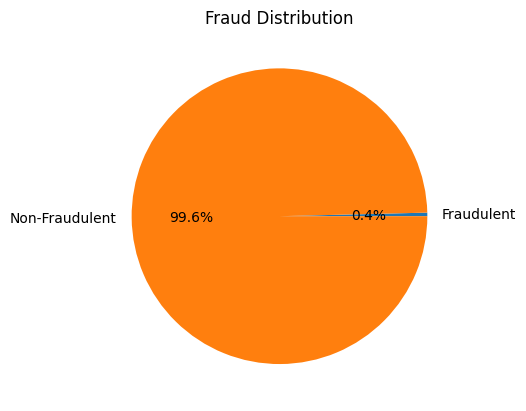

In [52]:
labels = 'Fraudulent', 'Non-Fraudulent'
sizes = [df['is_fraud'].sum(), len(df) - df['is_fraud'].sum()] 

plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("Fraud Distribution")
plt.show()